In [1]:
from pathlib import Path
from statistics import mean

import torch
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scikit_posthocs as sp
import scipy.stats as ss

In [2]:
dir = Path('results/')
files = dir.glob('*pt')
results = [torch.load(file) for file in files]

In [3]:
dict_data = {name: result[:, 0].numpy() for name, result in results}
data = (
  pd.DataFrame(dict_data)
  .rename_axis('cv_fold')
  .melt(
      var_name='estimator',
      value_name='score',
      ignore_index=False,
  )
  .reset_index()
)
data

,cv_fold,estimator,score
0,0,GCN,0.361195
1,1,GCN,0.325927
2,2,GCN,0.298732
3,3,GCN,0.304619
4,4,GCN,0.267153
...,...,...,...
115,25,GraphConv,0.229843
116,26,GraphConv,0.227173
117,27,GraphConv,0.229699
118,28,GraphConv,0.227986


In [4]:
avg_rank = data.groupby('cv_fold').score.rank(pct=True, ascending=False).groupby(data.estimator).mean()
avg_rank

estimator
Chebyshev    0.583333
GCN          0.616667
GraphConv    0.958333
SAGE         0.341667
Name: score, dtype: float64

In [5]:
ss.friedmanchisquare(*dict_data.values())

FriedmanchisquareResult(statistic=55.639999999999986, pvalue=5.013791463585004e-12)

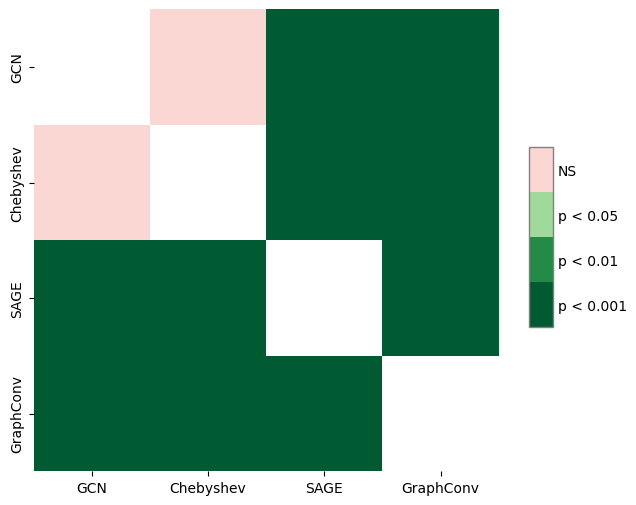

In [9]:
test_results = sp.posthoc_conover_friedman(
    data,
    melted=True,
    block_col='cv_fold',
    group_col='estimator',
    y_col='score',
)
plt.figure(figsize=(6, 6), dpi=100)
sp.sign_plot(test_results)

/home/gsoliveira/anaconda3/envs/pattern-recognition/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


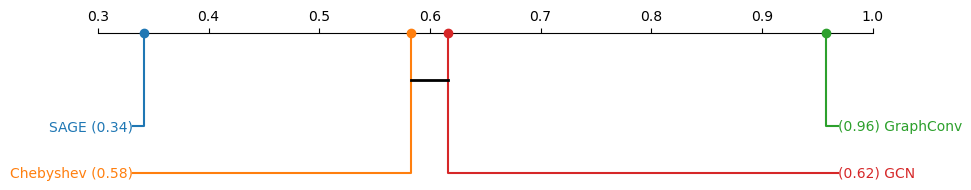

In [7]:
plt.figure(figsize=(10, 2), dpi=100)
# plt.title('Critical difference diagram of average score ranks')
sp.critical_difference_diagram(avg_rank, test_results)
plt.savefig('Critical diagram.png')

/home/gsoliveira/anaconda3/envs/pattern-recognition/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'Series.swapaxes' is deprecated and will be removed in a future version. Please use 'Series.transpose' instead.
  return bound(*args, **kwds)


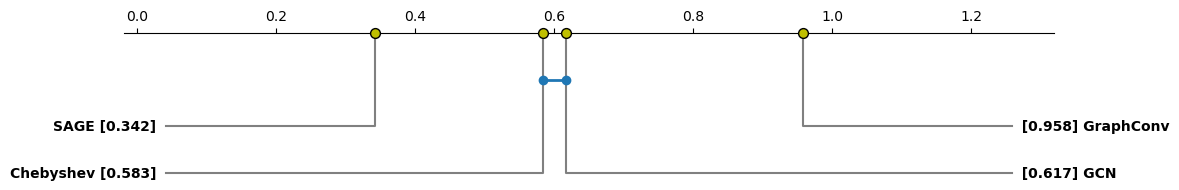

In [8]:
plt.figure(figsize=(12, 2), dpi=100)
sp.critical_difference_diagram(
    ranks=avg_rank,
    sig_matrix=test_results,
    label_fmt_left='{label} [{rank:.3f}]  ',
    label_fmt_right='  [{rank:.3f}] {label}',
    text_h_margin=0.3,
    label_props={'color': 'black', 'fontweight': 'bold'},
    crossbar_props={'color': None, 'marker': 'o'},
    marker_props={'marker': 'o', 's': 50, 'color': 'y', 'edgecolor': 'k'},
    elbow_props={'color': 'gray'},
)
plt.savefig('Critical diagram pretty.png')